In [0]:
%pip install tensorflow==2.18.0


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
# Importando bibliotecas
import os
import time
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Biblioteca de redes neurais
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN
from tensorflow.keras.losses import sparse_categorical_crossentropy


In [0]:
# Nome do arquivo de texto
file_name = 'shakespeare.txt'
file_path = f'https://storage.googleapis.com/download.tensorflow.org/data/{file_name}'

# Caminho do local do arquivo
path_to_file = tf.keras.utils.get_file(file_name, file_path)

# Acessando e lendo o arquivo
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# Exibindo as últimas 250 palavras dos textos de Shakespeare
print() # pulando linha
print(text[:250])


First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [0]:
# Imprimindo a quantidade e quais são os caracteres únicos uilizadas
# nos textos de Shakespeare

# Ordenando e recuperando somente os caracteres únicos do texto
vocab = sorted(set(text))

# Imprimindo a quantida de caracteres únicos nos texto de Shakespeare
print(f'Quantidade de caracteres únicos: {len(vocab)}')

# Imprimindo os caracteres únicos
print(f'Caracteres Únicos: {vocab}')

Quantidade de caracteres únicos: 65
Caracteres Únicos: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [0]:
# Cria um dicionário onde a chave é o caractere e o valor
# é o índice deste caractere
char_to_ind = {value:index for index, value in enumerate(vocab)}

# Print de debug, para exibir a estrutura do dicionário
# criado no comando anterior. Exibe o décimo quinto ao
# décimo nono elemento do dicionário de caracteres
print(f'Estrutura do dicionário de caracteres: {list(char_to_ind.items())[15:20]}')

# Print de debug, para exibir como acessar o índice do caractere
# utilizando o dicionário criado anteriormente
print(f'Índice do caractere `C`: {char_to_ind["C"]}')

Estrutura do dicionário de caracteres: [('C', 15), ('D', 16), ('E', 17), ('F', 18), ('G', 19)]
Índice do caractere `C`: 15


In [0]:
# Cria o dicionário inverso: índice → caractere
ind_to_char = {index: value for index, value in enumerate(vocab)}

In [0]:
# Converte as letras em seus respectivos índiecs numéricos
text_as_int = np.array([char_to_ind[char] for char in text])

# Utiliza a função `tf.data.Dataset.from_tensor_slices()` do TensorFlow
# para criar um objeto de sequencia textual com os índices
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

# DEBUG
# =====
# Cria uma variável auxiliar para conter/escrever a frase com as letras
# dentro do objeto textual
frase = ''

# Exemplo para debug: Itera sobre o objeto textual, pegando somente os 5
# primeiros caracteres da sequência, pegando os índices das letras e as letras
# para criar uma frase
for char in char_dataset.take(5):
    print(f'Índice da Letra: {char.numpy()}')
    print(f'Letra associada ao índice: {ind_to_char[char.numpy()]}')

    # Adiciona a letra à variável auxiliar
    frase += ind_to_char[char.numpy()]

    print(f'Frase sendo construída: {frase}')
    print() # pula uma linha

# Print de debug, mostrando a frase final construída
print() # pula uma linha
print(f'Frase Final: "{frase}"')

Índice da Letra: 18
Letra associada ao índice: F
Frase sendo construída: F

Índice da Letra: 47
Letra associada ao índice: i
Frase sendo construída: Fi

Índice da Letra: 56
Letra associada ao índice: r
Frase sendo construída: Fir

Índice da Letra: 57
Letra associada ao índice: s
Frase sendo construída: Firs

Índice da Letra: 58
Letra associada ao índice: t
Frase sendo construída: First


Frase Final: "First"


In [0]:
# Tamanho máximo de caracteres por sequência
sequence_length = 100

# Gera uma sequência em batches a partir do dataset textual
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

# Quantidade de sequências textuais
print(f'Quantidade de sequências : {len(list(sequences.as_numpy_iterator()))}')
print()  # pula uma linha

# DEBUG
# =====
# Variável auxiliar para ajudar na contagem da quantidade das sequências
qty_seq = 1

# Iterando sobre as 5 primeiras sequências para visualizarmos os seus conteúdos.
# Exibe todos os caracteres, mesmo os espaços e quebras de linha (\n)
for item in sequences.take(5):
    seq_text = "".join(ind_to_char[int(i)] for i in item.numpy().tolist())
    print(f'Sequência {qty_seq}: {repr(seq_text)}')
    qty_seq += 1
    print()


Quantidade de sequências : 11043

Sequência 1: 'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '

Sequência 2: 'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'

Sequência 3: "now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"

Sequência 4: "ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"

Sequência 5: 'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'



In [0]:
def split_input_target(chunk):
    """
    Função que faz o shift do texto de entrada, gerando o
    texto de saída
    """
    # Pega o texto de entrada e remove o último caractere
    input_text = chunk[:-1]

    # Pega o texto de entrada selecionado todos os caracteres,
    # exceto o primeiro
    target_text = chunk[1:]

    # Retorna uma tupla contendo o texto de entrada e o texto esperado
    # na saída da rede neural
    return input_text, target_text

In [0]:
def split_input_target(chunk):
    """
    Função que faz o shift do texto de entrada, gerando o
    texto de saída
    """
    input_text = chunk[:-1]   # todos os caracteres menos o último
    target_text = chunk[1:]   # todos os caracteres menos o primeiro
    return input_text, target_text

# Cria o dataset de treinamento
dataset_raw = sequences.map(split_input_target)

# DEBUG
print(f'Tamanho do DataFrame: {len(list(dataset_raw.as_numpy_iterator()))}\n')

for input_example, target_example in dataset_raw.take(1):
    print('Tamanho de caracteres da sequência de entrada:', len(input_example.numpy()))
    print('Tamanho de caracteres da sequência de saída:', len(target_example.numpy()))
    print()
    print(f'Texto (batch) de Input da rede: {repr("".join(ind_to_char[i] for i in input_example.numpy()))}')
    print(f'Texto esperado na saída da rede: {repr("".join(ind_to_char[i] for i in target_example.numpy()))}')


Tamanho do DataFrame: 11043

Tamanho de caracteres da sequência de entrada: 100
Tamanho de caracteres da sequência de saída: 100

Texto (batch) de Input da rede: 'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Texto esperado na saída da rede: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [0]:
# Quantidade de caracteres de cada batch
BATCH_SIZE = 64

# Variável utilizada para definir o tamanho do buffer de embaralhamento
# (quanto menor, mais rápido — use 1000 para testes)
BUFFER_SIZE = 1000

# Cria o dataset de forma embaralhada e agrupada
dataset = dataset_raw.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Para depuração, limite a quantidade de batches (por exemplo, apenas 100)
dataset = dataset.take(100)

# Exibe quantidade de batches do dataset reduzido
print(f'Quantidade de batches (amostra para teste): {len(list(dataset))}')
print()  # pula uma linha

# Visualiza um exemplo do batch
for input_text, target_text in dataset.take(1):
    print(f'Índices de entrada do primeiro batch:\n{input_text}')
    print()
    print(f'Índices de saída do primeiro batch:\n{target_text}')


Quantidade de batches (amostra para teste): 100

Índices de entrada do primeiro batch:
[[57 61 39 ... 46 58  0]
 [39 41 43 ... 14 56 43]
 [58 39 49 ... 40 50 43]
 ...
 [57 58 39 ... 57 43  1]
 [28 39 58 ... 61 53 52]
 [60 39 58 ... 26 33 31]]

Índices de saída do primeiro batch:
[[61 39 63 ... 58  0 14]
 [41 43 11 ... 56 43 39]
 [39 49 43 ... 50 43 57]
 ...
 [58 39 56 ... 43  1 61]
 [39 58 56 ... 53 52 58]
 [39 58 43 ... 33 31 10]]


2025-11-12 23:36:13.989632: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

# Função responsável por criar a estrutura da rede neural
def build_model(
    vocab_size,     # Tamanho do vocabulário (quantidade de caracteres únicos)
    embedding_dim,  # Dimensão da camada de entrada
    rnn_units,      # Quantidade de neurônios da camada RNN
    batch_size      # Quantidade de caracteres de cada batch
):
    # Cria o objeto que representa o modelo sequencial
    model = Sequential()

    # Camada de embedding (transforma índices de caracteres em vetores)
    model.add(
        Embedding(
            input_dim=vocab_size,   # Tamanho do vocabulário
            output_dim=embedding_dim,  # Dimensão de cada vetor de embedding
            batch_input_shape=[batch_size, None]  # Necessário quando stateful=True
        )
    )

    # Camada recorrente (RNN)
    model.add(
        SimpleRNN(
            units=rnn_units,         # Quantidade de neurônios
            return_sequences=True,   # Retorna saída a cada timestep
            stateful=True,           # Mantém estado entre batches
            recurrent_initializer='glorot_uniform'  # Inicializador padrão
        )
    )

    # Camada densa de saída (um neurônio por caractere possível)
    model.add(Dense(vocab_size))

    return model


In [0]:
# DEBUG
# =====
# Lista de caracteres dentro do texto
print(vocab)

['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Input

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = Sequential()

    # Camada de entrada explícita
    model.add(Input(batch_shape=(batch_size, None)))

    # Camada de embedding
    model.add(
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim
        )
    )

    # Camada RNN
    model.add(
        SimpleRNN(
            units=rnn_units,
            return_sequences=True,
            stateful=True,
            recurrent_initializer='glorot_uniform'
        )
    )

    # Camada de saída
    model.add(Dense(vocab_size))

    return model


In [0]:
# ===================================
# PARÂMETROS DO MODELO RNN
# ===================================

# Tamanho do vocabulário (definido a partir do texto)
vocab_size = len(vocab)

# Quantidade de dimensões do embedding (como cada caractere será representado numericamente)
embedding_dim = 64

# Quantidade de neurônios na camada RNN
rnn_units = 256

# Tamanho do batch
BATCH_SIZE = 64

# Tamanho da sequência de caracteres (janela de contexto)
SEQUENCE_LENGTH = 100

# Confirma os parâmetros
print("===== CONFIGURAÇÃO DO MODELO =====")
print(f"Vocab size       : {vocab_size}")
print(f"Embedding dim    : {embedding_dim}")
print(f"RNN units        : {rnn_units}")
print(f"Batch size       : {BATCH_SIZE}")
print(f"Sequence length  : {SEQUENCE_LENGTH}")
print("===================================")


===== CONFIGURAÇÃO DO MODELO =====
Vocab size       : 65
Embedding dim    : 64
RNN units        : 256
Batch size       : 64
Sequence length  : 100


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Input

# Função responsável por criar a estrutura da rede neural
def build_model(vocab_size, embedding_dim, rnn_units, batch_size, sequence_length):
    model = Sequential()

    # Camada de entrada explícita — agora com tamanho fixo (100)
    model.add(Input(batch_shape=(batch_size, sequence_length)))

    # Camada de embedding
    model.add(
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim
        )
    )

    # Camada RNN
    model.add(
        SimpleRNN(
            units=rnn_units,
            return_sequences=True,
            stateful=True,
            recurrent_initializer='glorot_uniform'
        )
    )

    # Camada de saída
    model.add(Dense(vocab_size))

    return model

BATCH_SIZE = 64
SEQUENCE_LENGTH = 100  # fixo para exibir no summary

# Cria o modelo
model = build_model(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE,
    sequence_length=SEQUENCE_LENGTH
)

# Mostra o resumo do modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (64, 100, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (64, 100, 256)         │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 100, 65)          │        16,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,041 (402.50 KB)

 Trainable params: 103,041 (402.50 KB)

 Non-trainable params: 0 (0.00 B)

In [0]:
# Função Objetiva
# Esta função tem o objetivo de auxiliar o modelo no processo de aprendizado
# A função pode ser chamada com a assinatura scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    # Retorna um objeto do tipo `sparse_categorical_crossentropy`, que irá
    # calcular a probabilidade do próximo caractere
    return sparse_categorical_crossentropy(
        y_true=labels,
        y_pred=logits,
        from_logits=True
    )

In [0]:
# O otimizador do modelo será a função de gradiente descendente stocástico,
# que é conhecida como ADAM.
# O parêmtro `learning_rate` é responsável por auxiliar o modelo a diminuir
# os erros.
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Utiliza a estrutura da rede neural criada anteriormente, e adiciona as funções
# objetivas e o otimizador ao modelo
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

# Definição do diretório onde serão armazenados os checkpoints do
# modelo. Esses checkpoints são utilizados para salvar os pesos e biases (vieses)
# do modelo ao longo do treinamento
checkpoint_dir = 'tmp/checkpoints/'
os.makedirs(checkpoint_dir, exist_ok=True)

# Configura o prefixo do nome dos checkpoints gerados pelo modelo, de forma que
# cada checkpoint cotenha também a época de treinamento.
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt.keras')

# DEBUG
# =====
print(checkpoint_prefix)

# Define o objeto que irá salvar os checkpoints do modelo ao longo do
# treinamento
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix
)

tmp/checkpoints/ckpt.keras


In [0]:
# Quantidade de épocas/rodadas de treinamento. Quanto mais epochs houverem
# melhor serão os resultados do modelo, porém, ele demorará mais para treinar
EPOCHS=3

# Treinamento do modelo
history = model.fit(
  # Dados utilizados para treinamento
  x=dataset,

  # Quantidade de rodada de treinamento
  epochs=EPOCHS,

  # Funções que deverão ser executadas a cada etapa de treinamento
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 153ms/step - loss: 2.8777
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 2.2800
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 2.1213


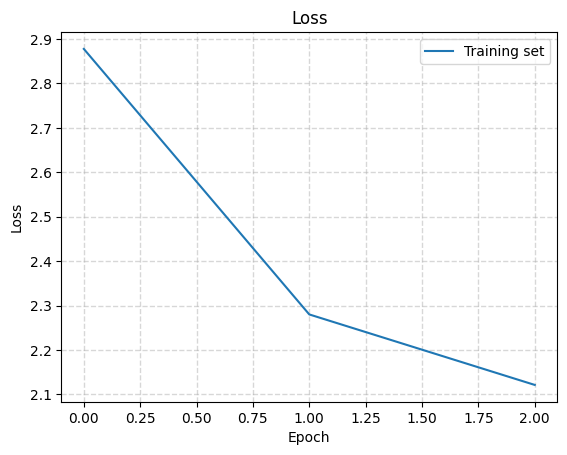

In [0]:
# Função responsável por exibir o gráfico de aprendizado do modelo
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

# Exibição do gráfico de aprendizado do modelo
# Quanto mais próximo do zero a linha estiver do eixo X, melhor serão
# os resultados do modelo
render_training_history(history)


In [0]:
# Quantidade de batches que serão utilizadas na geração do modelo
simplified_batch_size = 1

# Define o mesmo tamanho de sequência usado no treinamento
SEQUENCE_LENGTH = 100  # deve ser o mesmo do modelo principal

# Gera um novo modelo com os mesmos parâmetros do modelo anterior,
# porém com somente 1 batch (para geração de texto)
new_model = build_model(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=simplified_batch_size,
    sequence_length=SEQUENCE_LENGTH
)

# Constrói o novo modelo conforme as configurações atuais.
shape = tf.TensorShape([simplified_batch_size, SEQUENCE_LENGTH])
new_model.build(shape)

# Carrega os pesos e biases gerados no treinamento do modelo anterior
new_model.load_weights(checkpoint_prefix)

print("✅ Pesos carregados com sucesso! O modelo está pronto para gerar texto.")


✅ Pesos carregados com sucesso! O modelo está pronto para gerar texto.


In [0]:
def generate_text(model, start_string, num_generate=1000, temperature=1.0):
    print('INÍCIO DA PREVISÃO')

    # Vetoriza o texto inicial (converte caracteres em índices)
    input_indices = [char_to_ind[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    text_generated = []

    # Reseta o estado de todas as camadas RNN stateful
    for layer in model.layers:
        if hasattr(layer, "reset_states"):
            layer.reset_states()

    # Loop de geração de texto
    for i in range(num_generate):
        predictions = model(input_indices)

        # Remove a dimensão do batch
        predictions = tf.squeeze(predictions, 0)

        # Ajusta pela temperatura
        predictions = predictions / temperature

        # Amostra o próximo caractere
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        # Atualiza a entrada para o próximo passo
        input_indices = tf.expand_dims([predicted_id], 0)

        # Adiciona o caractere gerado
        text_generated.append(ind_to_char[predicted_id])

    print('FIM DA PREVISÃO\n')
    return start_string + ''.join(text_generated)


In [0]:
# Gera somente 1 caractere com a temperatura mais baixa possível (1)
print(generate_text(new_model, num_generate=1, start_string=u"ROMEO: "))

INÍCIO DA PREVISÃO
FIM DA PREVISÃO

ROMEO: j


In [0]:
# Gera 5 caracteres com a temperatura mais baixa possível (1)  - First Citizen:
print(generate_text(new_model, num_generate=5, start_string=u"ROMEO:"))

INÍCIO DA PREVISÃO
FIM DA PREVISÃO

ROMEO:
Nper


In [0]:
# Gera 10 caracteres
print(generate_text(new_model, num_generate=10, start_string=u"ROMEO: "))

INÍCIO DA PREVISÃO
FIM DA PREVISÃO

ROMEO: ain that r


In [0]:
# Gera 20 caracteres
print(generate_text(new_model, num_generate=20, start_string=u"ROMEO: "))

INÍCIO DA PREVISÃO
FIM DA PREVISÃO

ROMEO: whor shive, my Felli


In [0]:
# Gera 1000 caracteres
print(generate_text(new_model, num_generate=100, start_string=u"ROMEO: "))

INÍCIO DA PREVISÃO
FIM DA PREVISÃO

ROMEO: bo dowerl-ther sceat foarig,.

SE
TiRD HINGORET:
I va dhee wor fhie mingage, sin I kece ir.

HERHURF
